# Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# load labeled data
train = pd.read_csv('balanced_cleaned_train.csv')
y_train = train['label']
Xtest = pd.read_csv('cleaned_Xtest.csv')
ytest = pd.read_csv('cleaned_ytest.csv')

train.head()

,Unnamed: 0,id,label,tweet,clean_text
0,5240,5241,1,if reginald mcfadden had face to face intervie...,reginald mcfadden face face interview returnin...
1,3936,3937,1,the latest science u can use daily! thanks to...,latest scienc u use daili thank user
2,3141,3142,1,@user dealing with relatives reminding you tha...,user deal rel remind clock tick might help chi...
3,23649,23650,1,@user @user #israelis invented #apaheid #goyi...,user user isra invent apaheid goy word user user
4,22067,22068,1,racism in america: 'kill obama' and 'muslims n...,racism america 'kill obama' 'muslim welcom her...


# Vectorization

In [2]:
# Create corpus of text for all data
data = train.append(Xtest)
# Drop NA text
data = data[~data['clean_text'].isna()]
corpus = []
for i in range(data.shape[0]):
    corpus.append(data.iloc[i]["clean_text"])

In [3]:
# Based on TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
densemat = X.todense()
denselist = densemat.tolist()
X = pd.DataFrame(denselist, columns=words)
X.head()

,aaaaaand,aaaaah,aaaaand,aaahhhh,aaand,aaawwwww,aah,aand,aap,aarhu,...,zoolog,zoologist,zootopia,zoro,zorro,zshq,zuma,zurich,zydeco,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test = len(Xtest)
X_test = X.iloc[-test:]
X_train = X.iloc[:-test]
y_train = data['label'].iloc[:-test]
y_test = data['label'].iloc[-test:]

# Build Models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [6]:
X_train.shape

(3556, 14721)

In [7]:
len(y_train)

3556

In [8]:
# List of models

# Logistic Regression
log_reg = LogisticRegression()

# Naives Bayes
naive_clf = GaussianNB()

# Decision Tree
dt_clf = tree.DecisionTreeClassifier()

# Random forest
rand_clf = RandomForestClassifier()

# Boosting
grad_clf = GradientBoostingClassifier()

In [9]:
# Logistic regression - CV
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
scores = cross_validate(log_reg, X_train, y_train, scoring=scoring,
                         cv=5)
print(scores.keys())
print(scores['test_acc']) 

log_reg_acc = scores['test_acc'].mean()
log_reg_pre = scores['test_prec_macro'].mean()
log_reg_rec = scores['test_rec_micro'].mean()

dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_micro'])
[0.85533708 0.86075949 0.85232068 0.86919831 0.84528833]


In [10]:
# Naives Bayes - CV
scores = cross_validate(naive_clf, X_train, y_train, scoring=scoring,
                         cv=5)
print(scores.keys())
print(scores['test_acc']) 

naive_acc = scores['test_acc'].mean()
naive_pre = scores['test_prec_macro'].mean()
naive_rec = scores['test_rec_micro'].mean()

dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_micro'])
[0.73735955 0.7440225  0.72151899 0.75105485 0.73839662]


In [11]:
# Decision Tree - hyperparameter tuning + CV
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

grid_dt=RandomizedSearchCV(estimator=dt_clf,param_distributions=param_dist,verbose=True)
scores = cross_validate(grid_dt, X_train, y_train, scoring=scoring,
                         cv=5)
print(scores.keys())
print(scores['test_acc']) 

dt_acc = scores['test_acc'].mean()
dt_pre = scores['test_prec_macro'].mean()
dt_rec = scores['test_rec_micro'].mean()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.8s finished
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.2s finished


dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_micro'])
[0.74719101 0.50070323 0.72292546 0.72011252 0.71729958]


In [12]:
# Random forest - hyperparameter tuning + CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

grid_rf=RandomizedSearchCV(estimator=rand_clf,param_distributions=random_grid,verbose=True)
scores = cross_validate(grid_rf, X_train, y_train, scoring=scoring,
                         cv=5)
print(scores.keys())
print(scores['test_acc']) 

rf_acc = scores['test_acc'].mean()
rf_pre = scores['test_prec_macro'].mean()
rf_rec = scores['test_rec_micro'].mean()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.8min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.5min finished


dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_micro'])
[0.82162921 0.8326301  0.8185654  0.84528833 0.83825598]


In [13]:
# Boosting - hyperparameter tuning + CV

# Number of boosting stages
n_estimators = [10,50,100,200]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [2,3,5]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Learning rate
learning_rate = [0.1,1,5]

# Create the random grid
boost_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'learning_rate':learning_rate}

grid_boost=RandomizedSearchCV(estimator=grad_clf,param_distributions=boost_grid,verbose=True)
scores = cross_validate(grid_boost, X_train, y_train, scoring=scoring,
                         cv=5)

print(scores.keys())
print(scores['test_acc']) 

boost_acc = scores['test_acc'].mean()
boost_pre = scores['test_prec_macro'].mean()
boost_rec = scores['test_rec_micro'].mean()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 11.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.9min finished


dict_keys(['fit_time', 'score_time', 'test_acc', 'test_prec_macro', 'test_rec_micro'])
[0.73174157 0.8045007  0.81293952 0.82419128 0.79746835]


In [14]:
# Create a Dataframe with the results.
results = {'Classifiers': ['Logistic Regression', 'Naives Bayes', 'Decision Tree', 'Random Forest','Gradient Boosting'], 
    'Accuracy': [log_reg_acc, naive_acc, dt_acc, rf_acc, boost_acc],
    'Precision': [log_reg_pre, naive_pre, dt_pre, rf_pre, boost_pre],
    'Recall': [log_reg_rec, naive_rec, dt_rec, rf_rec, boost_rec]}

result_df = pd.DataFrame(data=results)
result_df

,Classifiers,Accuracy,Precision,Recall
0,Logistic Regression,0.856581,0.857354,0.856575
1,Naives Bayes,0.738471,0.761069,0.738388
2,Decision Tree,0.681646,0.634184,0.681518
3,Random Forest,0.831274,0.832618,0.831290
4,Gradient Boosting,0.794168,0.795117,0.794162


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
res = result_df.melt('Classifiers', var_name='measure', value_name='val')
res.head()

,Classifiers,measure,val
0,Logistic Regression,Accuracy,0.856581
1,Naives Bayes,Accuracy,0.738471
2,Decision Tree,Accuracy,0.681646
3,Random Forest,Accuracy,0.831274
4,Gradient Boosting,Accuracy,0.794168


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x360 with 0 Axes>

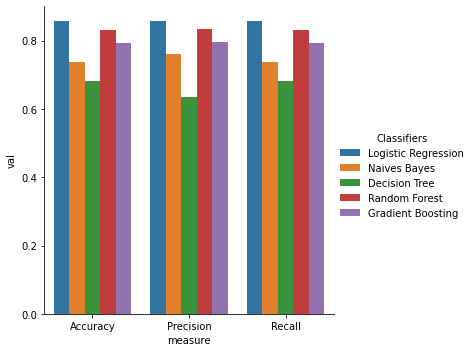

In [17]:
# Plot accuracy, precision, recall of the models
plt.figure(figsize= (10,5))
sns.factorplot(x='measure', y='val', hue='Classifiers', data=res, kind='bar');

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.2min finished


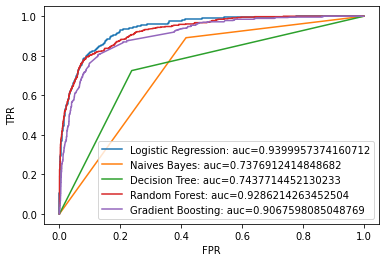

In [36]:
# Plot ROC
# Pick model with highest AUC
import matplotlib.pyplot as plt
from sklearn import metrics
models = [log_reg,naive_clf,grid_dt,grid_rf,grid_boost]
names = ['Logistic Regression', 'Naives Bayes', 'Decision Tree', 'Random Forest','Gradient Boosting']
for i in range(len(models)):
    model = models[i]
    model.fit(X_train,y_train)
    fpr, tpr, _ = metrics.roc_curve(y_test,  model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label = names[i] + ": auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();